<a href="https://colab.research.google.com/github/yjodev/Tobigs19/blob/main/W2_Regression_%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
filepath = 'drive/MyDrive/투빅스/과제/W2_Regression/'
data = pd.read_csv(filepath + "assignment3_creditcard.csv")

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [5]:
# Class 열을 범주형 변수화한다
data["Class"] = pd.Series(data["Class"], dtype = "category")

In [6]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [8]:
data.describe()
# scaling이 필요하다

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


# Scaling

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((21508, 28), (7170, 28), (21508,), (7170,))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 평균 0, 분산 1로 조정
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
# X_train data를 scaled 된 data로 저장. 기존 column명 사용
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.325593,0.574378,0.052199,0.060309,1.200907,-1.116495,1.153906,-0.385993,-1.288142,-0.278995,...,1.325607,0.246580,0.355098,1.290349,-1.193983,0.085077,2.626317,2.138393,-0.178480,0.082706
1,0.679228,-0.389079,0.245032,-0.447803,-0.726651,-0.797593,-0.289088,-0.169371,-0.654869,0.532457,...,0.609887,0.161016,0.173485,0.433910,-0.096171,0.683450,0.929846,-0.432348,-0.007872,0.060221
2,-0.065628,0.233976,1.048914,0.011105,0.217549,0.574530,0.101356,0.139912,-0.143811,0.057379,...,0.871268,0.129216,-0.084699,-0.080292,-0.256860,-1.418187,-0.502001,0.700057,-0.382665,-0.806101
3,0.992426,-0.058177,-0.415138,0.205064,-0.144376,-0.881869,0.134564,-0.238284,0.540998,-0.052758,...,-0.007296,-0.194761,-0.478900,-1.527376,0.778746,-0.037943,-0.947528,-1.823692,0.006528,-0.107006
4,0.939575,-0.260967,-0.226647,0.907480,-0.168543,0.298768,-0.324591,0.240727,1.062690,0.190708,...,0.528888,-0.531223,-0.586560,-1.725562,0.805679,0.938744,-0.794002,-2.374972,0.089148,-0.129810


In [12]:
# X_train data의 전처리 과정과 동일하다. 
# scaling시 fit_transform이 아니라 transform만 한다.
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.536270,-0.325982,0.718891,0.065985,-0.653250,0.242654,-0.471467,0.194132,0.716241,-0.255216,...,0.364618,-0.012034,-0.152577,-0.114897,0.163673,0.554008,0.057509,1.940556,-0.049695,0.020662
1,-0.001142,-0.090335,0.264597,-0.328537,1.737487,-1.367655,-1.504108,-0.558540,0.250936,0.146402,...,0.165514,-0.775019,0.563894,-2.309850,-6.359472,-0.545745,-0.733293,0.379523,0.719416,1.104299
2,-0.145076,0.304413,0.010803,2.130016,-0.090001,0.911819,0.453249,0.535452,-0.856761,0.473586,...,-1.623783,-0.079397,0.588778,1.638375,0.696830,1.229137,-0.727464,0.185689,-0.334240,-0.125347
3,0.647227,0.065172,-0.222531,0.057005,0.467144,0.522065,-0.083930,0.165038,0.009438,-0.073446,...,0.463875,-0.133864,-0.400373,-1.315650,-0.081458,-2.947639,0.622165,0.450472,-0.044243,-0.013952
4,0.933435,-0.983654,-1.163216,-0.820549,-0.039010,0.011376,-0.175220,-0.091113,-0.523760,0.801182,...,1.261463,0.588830,0.614641,1.370994,-0.465628,-0.498611,0.435535,0.145692,-0.225193,-0.154308


In [13]:
# parameter 개수 = 열의 개수
N = len(X_train.loc[0]) # 첫번째 행의 길이 
N

28

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [15]:
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
pred_proba = model.predict_proba(X_test)[:, -1].reshape(-1,1)

# 성능 지표
- Accuracy(정확도) : 전체 데이터중에서 맞게 분류된 데이터의 비율
- Error Rate(오류율) : 전체 데이터 중에서 잘못 분류한 값의 비율
- Recall(Sensitivity : 재현율) : 원래 positive 데이터에서 positive 로 분류된 수
- Precision(정밀도) : Positive 로 예측한 데이터 중에 실제 positive 인 비율
- Specificity(특이도) : negative로 판단한 내용 중에 실제 negative 인 비율
- False Positive Rate (위양성률) : Negative 로 판단한 값 중에 잘못 판단한 비율(실제로는 positive)
- f1_score : Recall과 Precision의 조화평균
- ROC 커브 : ROC 커브는 모델의 임계값을 조정
- AUC : AUC는 ROC 곡선 아래의 너비로, 1에 가까울 수록 좋은 모델



In [17]:
from sklearn.metrics import *


0.845360824742268

In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       0.79      0.91      0.85        45

    accuracy                           1.00      7170
   macro avg       0.89      0.95      0.92      7170
weighted avg       1.00      1.00      1.00      7170



In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

p = fn + tp
n = tn + fp

In [21]:
accuracy = (tp + tn) / (p + n)
print("Accuracy : ", accuracy) 

Accuracy :  0.997907949790795


In [22]:
errorRate = (fn + fp) / (p+n)
print("Error Rate : ", errorRate)

Error Rate :  0.0020920502092050207


In [23]:
recall = (tp) / p
print("Recall : ", recall)

Recall :  0.7884615384615384


In [24]:
precision = tp/ (tp + fp)
print("precision : ", precision)

precision :  0.9111111111111111


In [25]:
specificity =  tn / (tn + fp)
print("specificity : ", specificity)

specificity :  0.9994380443944928


In [26]:
fpr = fp / n
print("FPR : ", fpr) 

FPR :  0.000561955605507165


In [27]:
f1 = f1_score(y_pred, y_test)
print("f1 : ", f1)

f1 :  0.845360824742268


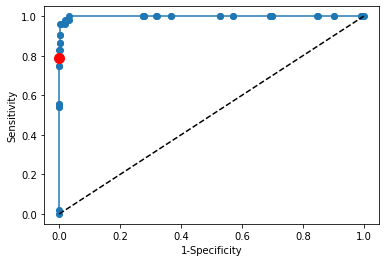

In [28]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [29]:
from sklearn.metrics import auc
print("auc : ", auc(fpr, tpr))

auc :  0.9987950374997298


# 성능 개선
- cut-off value란?
  - fpr = fall-out = 1-specificity
  - tpr = sensitivity
- target value는 사기 여부로, 사기에 해당하는 데이터의 개수가 매우 적다. 이런 binary분류의 성향을 갖는 경우 domain의 bias에 매우 예민하다. 
- 로지스틱 회귀로 구한 성능이 좋음에도 cut-off vlaue는 최적이 아니다.
- cut-off값을 낮춰 새로 모델을 예측해야 한다. 

# 최적 cut-off
- 최적의 cut-off value는 접선의 기울기가 1인 지점이다. 기울기가 1인 y = x + k 인 접선을 바탕으로 곡선과 접하는 지점을 찾자
- (sensitivity)-(1-specificity) = k 일 때, 가장 큰 k 값을 찾으면 된다. 그 k값을 바탕으로 새로운 cutoff value를 찾고 이를 기준으로 다시 y값들을 분류한다. 


In [30]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [32]:
predict_new = model.decision_function(X_test) > optimal_threshold

In [33]:
# 새로 구한 confusion matrix 
confusion_matrix(y_test, predict_new)

array([[6899,  219],
       [   1,   51]])

In [34]:
# 새로 구한 지표 
accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
specificity = (tn)/(fp+tn)
f1_score = 2*(precision*recall)/(precision+recall)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

accuracy:  0.997907949790795
precision:  0.9111111111111111
recall:  0.7884615384615384
specificity:  0.9994380443944928
f1_score:  0.845360824742268


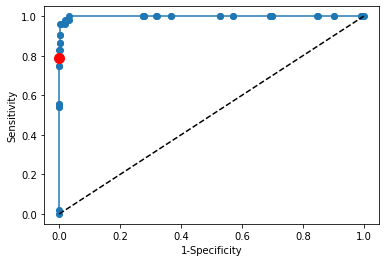

In [35]:
# 새로 구한 ROC curve
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()